# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install matplotlib

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [151]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    # Calculate sample means for each class
    x_pos=X_train[Y_train==1]
    x_neg=X_train[Y_train==-1]

    mean_pos = np.mean(x_pos, axis=0)
    mean_neg = np.mean(x_neg, axis=0)

    Y_test_pred=[]

    for i, x in enumerate(X_test):
    
        likelihood_pos=np.exp(-0.5*np.sum((x-mean_pos)**2))
        likelihood_neg=np.exp(-0.5*np.sum((x-mean_neg)**2))
        if likelihood_pos > likelihood_neg:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)



    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_pos=X_train[Y_train==1]
    x_neg=X_train[Y_train==-1]
    mean_pos = np.mean(x_pos, axis=0)
    mean_neg = np.mean(x_neg, axis=0)
    prob_y_pos= x_pos.size/X_train.size
    prob_y_neg= x_neg.size/X_train.size
    # Sigma = np.cov(np.concatenate((x_pos, x_neg), axis=0).T)
    # print(X_train.shape)
    Sigma = np.cov(np.concatenate((x_pos, x_neg), axis=0).T)
    Y_test_pred=[]
    # print(Sigma.shape)

    for i, x in enumerate(X_test):
        likelihood_pos=(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma)**(1/2))) * np.exp(-0.5 * np.dot((x - mean_pos).T, np.linalg.inv(Sigma) @ (x - mean_pos)))
        likelihood_neg=(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma)**(1/2))) * np.exp(-0.5 * np.dot((x - mean_neg).T, np.linalg.inv(Sigma) @ (x - mean_neg)))
        
        posterior_positive=likelihood_pos*prob_y_pos
        posterior_negative=likelihood_neg*prob_y_neg
        
        if posterior_positive > posterior_negative:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    x_pos=X_train[Y_train==1]
    x_neg=X_train[Y_train==-1]

    mean_pos = np.mean(x_pos, axis=0)
    mean_neg = np.mean(x_neg, axis=0)
    prob_y_pos= x_pos.size/X_train.size
    prob_y_neg=x_neg.size/X_train.size
    Sigma_pos = np.cov(x_pos.T)  
    Sigma_neg = np.cov(x_neg.T)
    Y_test_pred=[]

    for i, x in enumerate(X_test):
        likelihood_pos=(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma_pos)**(1/2))) * np.exp(-0.5 * np.dot((x - mean_pos).T, np.linalg.inv(Sigma_pos) @ (x - mean_pos)))
        likelihood_neg=(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma_neg)**(1/2))) * np.exp(-0.5 * np.dot((x - mean_neg).T, np.linalg.inv(Sigma_neg) @ (x - mean_neg)))
        
        posterior_positive=likelihood_pos*prob_y_pos
        posterior_negative=likelihood_neg*prob_y_neg
        
        if posterior_positive > posterior_negative:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)


    
    




In [18]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


In [152]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)


dataset_files = ['dataset1_1.npz', 'dataset1_2.npz', 'dataset1_3.npz']
datasets = [np.load(file) for file in dataset_files]

for i, dataset in enumerate(datasets):
    X_train = dataset['arr_0']
    Y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for j, classifier in enumerate([Bayes1a, Bayes1b, Bayes1c]):
        Y_pred = classifier(X_train, Y_train, X_test)
        correct_pred=np.sum(Y_pred==Y_test)
        false_pred=np.sum(Y_pred!=Y_test)
        accuracy=correct_pred/Y_test.shape[0]
        loss=false_pred/Y_test.shape[0]
        print(f'dataset1_{i+1} and Bayes{j+1}: Accuracy={accuracy}, loss={loss})')
       







dataset1_1 and Bayes1: Accuracy=0.874, loss=0.126)
dataset1_1 and Bayes2: Accuracy=0.8755, loss=0.1245)
dataset1_1 and Bayes3: Accuracy=0.8755, loss=0.1245)
dataset1_2 and Bayes1: Accuracy=0.9915, loss=0.0085)
dataset1_2 and Bayes2: Accuracy=1.0, loss=0.0)
dataset1_2 and Bayes3: Accuracy=1.0, loss=0.0)
dataset1_3 and Bayes1: Accuracy=0.503, loss=0.497)
dataset1_3 and Bayes2: Accuracy=0.505, loss=0.495)
dataset1_3 and Bayes3: Accuracy=0.865, loss=0.135)


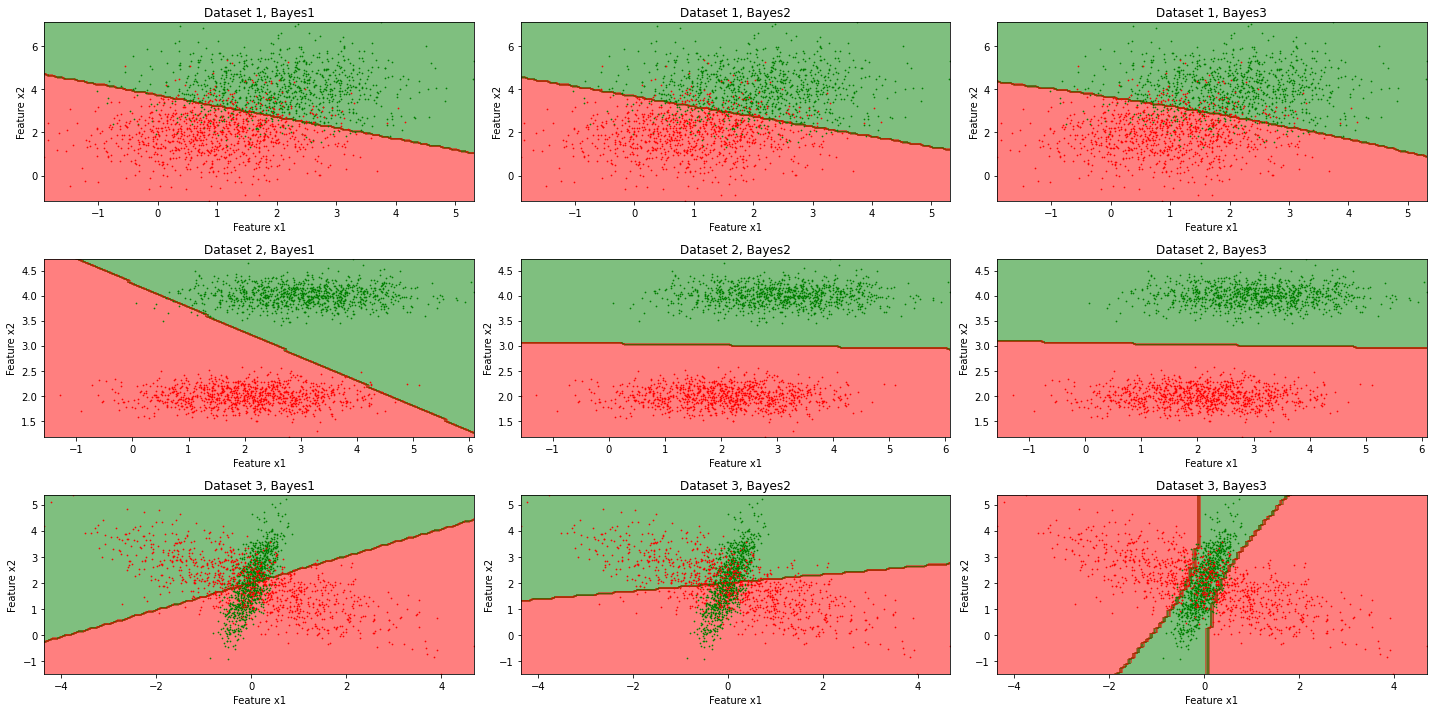

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load datasets
dataset_files = ['dataset1_1.npz', 'dataset1_2.npz', 'dataset1_3.npz']
datasets = [np.load(file) for file in dataset_files]


def plot_decision_boundary(ax, X, Y, X_test, Y_test, classifier, title):
    """
    Plots the decision boundary for a given classifier.

    Args:
        ax: Matplotlib axis object.
        X: Training data features.
        Y: Training data labels.
        X_test: Test data features.
        classifier: Function implementing the classification logic.
        title: Title for the plot.
    """

    # Plot decision boundary
    x_min = np.min(X, axis=0)
    x_max = np.max(X, axis=0)
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
    #                       np.arange(y_min, y_max,100))
    xx, yy = np.meshgrid(np.linspace(x_min[0], x_max[0], 100), np.linspace(x_min[1], x_max[1], 100))
    
    Z = classifier(X, Y, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Z = Z.reshape(xx.shape[0])  # Reshape to match meshgrid dimensions

    # cmap = ListedColormap(['lightgreen', 'lightred'])
    ax.contourf(xx, yy, Z, colors=['green', 'red'], alpha=0.5)

    ax.scatter(X[Y == -1, 0], X[Y == -1, 1], c='green', label='Class -1',s=0.5)
    ax.scatter(X[Y == 1, 0], X[Y == 1, 1], c='red', label='Class 1', s=0.5)

    ax.set_xlabel('Feature x1')
    ax.set_ylabel('Feature x2')

    # Plot training data points
    # ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.set_title(title)


# Plotting
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

for i, dataset in enumerate(datasets):
    X_train = dataset['arr_0']
    Y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for j, classifier in enumerate([Bayes1a, Bayes1b, Bayes1c]):
        ax = axs[i, j]
        plot_decision_boundary(ax, X_train, Y_train, X_test, Y_test, classifier, f'Dataset {i+1}, Bayes{j+1}')

plt.tight_layout()
plt.show()


## Observations 

From the plots it is evident, that :

1) Bayes1c is working better for both the data sets

2) If the data is distributed as Normal with unknown mean $\mu_a$ and known covariance $I$, then Bayes1a works fine.

3) If the data is distributed as Normal with unknown mean $\mu_a$ and unknown covariance $\Sigma$, then Bayes1b works fine.

4) If no extra information is given regarding the data, it's better to use Bayes2c classifier.


** Cell type : TextWrite ** 
(Write your observations and table of errors here)




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [171]:
L = np.array([[0, 1, 2, 3],
            [1, 0, 1, 2],
              [2, 1, 0, 1],
              [3, 2, 1, 0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    mean_a = [np.array([np.mean(X_train[Y_train == a][:,0]),np.mean(X_train[Y_train==a][:,1])]) for a in np.unique(Y_train)]
    
    prob = [X_train[Y_train==a].size/X_train.size for a in np.unique(Y_train)]
    Y_test_pred=[]

    for i, x in enumerate(X_test):
        likelihood=[(1 / (2*np.pi)**(len(x)/2)) * np.exp(-0.5 * np.dot((x - mean_a[j]).T, (x - mean_a[j]))) for j in  range(len(mean_a))]
        posterior=np.multiply(prob,likelihood)
        posterior = np.reshape(posterior, (len(posterior), 1))
        expected_losses=np.dot(posterior.T,L)    #
        bayes_class = np.argmin(expected_losses) + 1 
        
        Y_test_pred.append(bayes_class)
        
    return Y_test_pred


def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    mean_a = [np.array([np.mean(X_train[Y_train == a][:,0]),np.mean(X_train[Y_train==a][:,1])]) for a in np.unique(Y_train)]
    prob = [X_train[Y_train==a].size/X_train.size for a in np.unique(Y_train)]
    Sigma = np.cov(X_train.T)
    Y_test_pred=[]

    for i, x in enumerate(X_test):
        likelihood=[(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma)**(1/2))) * np.exp(-0.5 * np.dot((x - mean_a[j]).T, np.linalg.inv(Sigma) @ (x - mean_a[j]))) for j in range(len(mean_a))]
        posterior=np.multiply(prob,likelihood)
        posterior = np.reshape(posterior, (len(posterior), 1))
        expected_losses=np.dot(posterior.T, L)
        bayes_class = np.argmin(expected_losses) + 1 
        Y_test_pred.append(bayes_class)
        
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    mean_a = [np.array([np.mean(X_train[Y_train == a][:,0]),np.mean(X_train[Y_train==a][:,1])]) for a in np.unique(Y_train)]
    prob = [X_train[Y_train==a].size/X_train.size for a in np.unique(Y_train)]
    x_a = [X_train[Y_train==a] for a in np.unique(Y_train)]
    Sigma_a = [np.cov(x_a[i].T) for i in range(len(x_a))]
    Y_test_pred=[]

    for i, x in enumerate(X_test):
        likelihood=[(1 / ((2*np.pi)**(len(x)/2) * np.linalg.det(Sigma_a[j])**(1/2))) * np.exp(-0.5 * np.dot((x - mean_a[j]).T, np.linalg.inv(Sigma_a[j]) @ (x - mean_a[j]))) for j in range(len(mean_a))]
        
        posterior=np.multiply(prob,likelihood)
        posterior = np.reshape(posterior, (len(posterior), 1))
        expected_losses=np.dot(posterior.T, L)
        bayes_class = np.argmin(expected_losses) + 1 
        Y_test_pred.append(bayes_class)
        
    return Y_test_pred




In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


In [166]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)


dataset_files = ['dataset2_1.npz', 'dataset2_2.npz']
datasets = [np.load(file) for file in dataset_files]

for i, dataset in enumerate(datasets):
    X_train = dataset['arr_0']
    Y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for j, classifier in enumerate([Bayes2a, Bayes2b, Bayes2c]):
        Y_pred = classifier(X_train, Y_train, X_test)
        correct_pred=np.sum(Y_pred==Y_test)
        false_pred=np.sum(Y_pred!=Y_test)
        accuracy=correct_pred/Y_test.shape[0]
        loss=false_pred/Y_test.shape[0]
        print(f'dataset1_{i+1} and Bayes{j+1}: Accuracy={accuracy}, loss={loss}')
       





dataset1_1 and Bayes1: Accuracy=0.699, loss=0.301
dataset1_1 and Bayes2: Accuracy=0.64325, loss=0.35675
dataset1_1 and Bayes3: Accuracy=0.69925, loss=0.30075
dataset1_2 and Bayes1: Accuracy=0.8545, loss=0.1455
dataset1_2 and Bayes2: Accuracy=0.74975, loss=0.25025
dataset1_2 and Bayes3: Accuracy=0.89425, loss=0.10575


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

From the plots it is evident, that :

1) Bayes2c is working better for both the data sets

2) If the data is distributed as Normal with unknown mean $\mu_a$ and known variance $I$ the Bayes2a works fine.

3) If the data is distributed as Normal with unknown mean $\mu_a$ and unknown variance $\Sigma$ the Bayes2a works fine.

4) If no extra information is given regarding the data, it's better to use Bayes2c classifier.




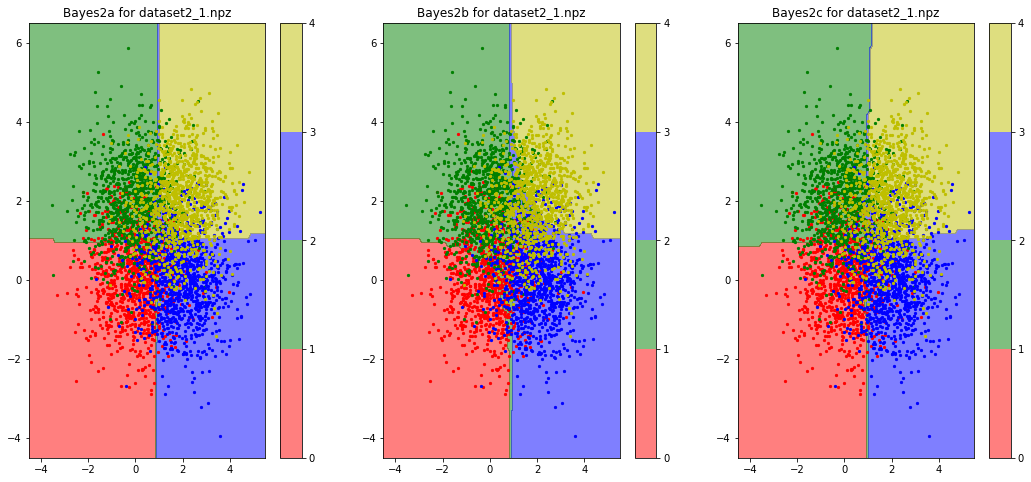

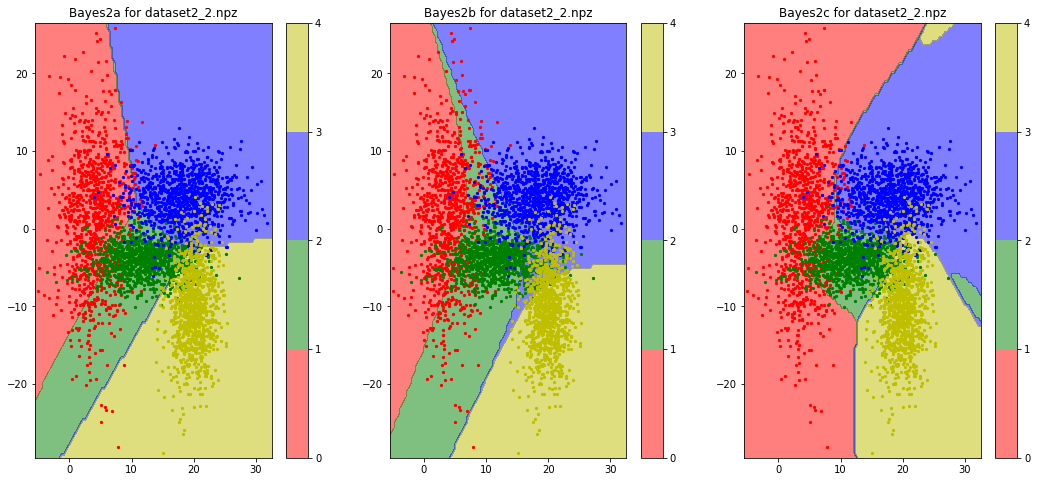

In [186]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data_names = ['dataset2_1.npz','dataset2_2.npz']
#d_s_1=np.load('dataset1_1.npz')
#d_s_2=np.load('dataset1_2.npz')
#d_s_3=np.load('dataset1_3.npz')
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train = d_s_2['arr_0']
    Y_train = d_s_2['arr_1']
    X_test  = d_s_2['arr_2']
    Y_test  = d_s_2['arr_3']
    
    X_train_1 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_2 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==2])
    X_train_3 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==3])
    X_train_4 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==4])
    
    # limits for plotting
    max_0   = round(np.max(X_train[:,0]))+0.5
    min_0   = round(np.min(X_train[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train[:,1]))+0.5
    min_1   = round(np.min(X_train[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)

    Y_test_gr_a = np.zeros(X_test_1.shape)
    Y_test_gr_b = np.zeros(X_test_1.shape)
    Y_test_gr_c = np.zeros(X_test_1.shape)


    for i in range(Y_test_gr_a.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        Y_test_gr_a[i,:] = Bayes2a(X_train,Y_train,X_test_gr)
        Y_test_gr_b[i,:] = Bayes2b(X_train,Y_train,X_test_gr)
        Y_test_gr_c[i,:] = Bayes2c(X_train,Y_train,X_test_gr)

        # print(X_test_gr)
    
    plt.figure(figsize=(18,8))
    
    plt.subplot(1,3,1)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_a,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.title('Bayes2a '+'for '+ str(data_set))
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.colorbar(d)
    
    plt.subplot(1,3,2)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_b,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.title('Bayes2b '+'for '+ str(data_set))
    plt.colorbar(d)
    
    plt.subplot(1,3,3)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_c,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.title('Bayes2c '+'for '+ str(data_set))
    plt.colorbar(d)



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [180]:
# Cell type : CodeWrite 
import numpy as np

# Load the dataset
data = np.load("dataset3_1.npz")
X_train_1000, Y_train_1000, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Define functions for ridge regression with L2 regularization
def polynomial_features(X, degree):
    powers = np.arange(degree + 1)
    combinations = np.array(np.meshgrid(*[powers] * X.shape[1])).T.reshape(-1, X.shape[1])
    # print("poli",degree,np.product(X[:, np.newaxis, :] ** combinations, axis=2))
    return np.product(X[:, np.newaxis, :] ** combinations, axis=2)
    
def polynomial_features1(X, degree):
    n_samples,n_features=X.shape
    x_poly=[]
    for n in range(n_samples):
        coefficient=[]
        for j in range(degree+1):
            for k in range(degree+1):
                if(j+k<=degree):
                    coefficient.append((X[n,0]**j)*(X[n,1]**k))
                    
        x_poly.append(coefficient)
    return np.array(x_poly)

def polyreg( lam, X , Y):

  I = np.identity(len(X[0]))

  penalty = lam * I

  XT_X = np.matmul(X.T,X)
  XT_X_penalty = XT_X + penalty
  XT_X_penalty_inv = np.linalg.pinv(XT_X_penalty)

  XT_Y = np.matmul(X.T,Y)
  weights = np.matmul(XT_X_penalty_inv,XT_Y)

  return weights

def ridge_regression(X_train, Y_train, X_test, alpha, degree):
    
    # Add polynomial features to X_train and X_test
    X_train_poly = polynomial_features1(X_train, degree)
    X_test_poly = polynomial_features1(X_test, degree)
    # print(X_train_poly.shape)
    
    # Compute the coefficient matrix using ridge regression formula
    Xt_X_lambdaI_inv = np.linalg.pinv(np.dot(X_train_poly.T, X_train_poly) + alpha*np.identity(len(X_train_poly[0])))
    coefficients = np.dot(np.dot(Xt_X_lambdaI_inv, X_train_poly.T), Y_train)
    
    # Predict target values for training and test data
    train_predictions = np.dot(X_train_poly, coefficients)
    test_predictions = np.dot(X_test_poly, coefficients)
    
    return train_predictions, test_predictions

# Define degrees and regularization parameters
degrees = [1, 2, 4, 8, 16]
alphas = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
subset_sizes = [50,100,200,1000]

# Initialize tables to store train and test errors
train_errors = np.zeros((len(subset_sizes), len(degrees), len(alphas)))
test_errors = np.zeros((len(subset_sizes), len(degrees), len(alphas)))

# Compute errors for each subset size, degree, and alpha
for i, size in enumerate(subset_sizes):
    indices = np.random.choice(len(X_train_1000), size, replace=False)
    X_train_subset = X_train_1000[0:size]
    Y_train_subset = Y_train_1000[0:size]
    for j, degree in enumerate(degrees):
        for k, alpha in enumerate(alphas):
            # Perform ridge regression
            train_pred, test_pred = ridge_regression(X_train_subset, Y_train_subset, X_test, alpha, degree)
            # Compute mean squared error for training and test data
            train_error = np.mean((Y_train_subset - train_pred)**2)
            test_error = np.mean((Y_test - test_pred)**2)
            train_errors[i, j, k] = train_error
            test_errors[i, j, k] = test_error
    

# Iterate through all cases and print the values
for i, size in enumerate(subset_sizes):
    print("####subset size:",size)
    print("Train Errors:")
    print(f"{'Degree':16}{'$lambda$=1e-9':25}{'$lambda$=1e-7':25}{'$lambda$=1e-5':25}{'$lambda$=1e-3':25}{'$lambda$=1e-1':25}{'$lambda$=10':25}")
    for j, degree in enumerate(degrees):
        print(degree,end='\t\t')
        row_data=["{:<25.5f}".format(train_errors[i][j][k]) for k in range(len(alphas))]
        print("".join(row_data))
    print("Test Errors:")
    print(f"{'Degree':16}{'$lambda$=1e-9':25}{'$lambda$=1e-7':25}{'$lambda$=1e-5':25}{'$lambda$=1e-3':25}{'$lambda$=1e-1':25}{'$lambda$=10':25}")
    for j, degree in enumerate(degrees):
        print(degree,end='\t\t')
        row_data=["{:<25.5f}".format(test_errors[i][j][k]) for k in range(len(alphas))]
        print("".join(row_data))
    print("--------------------------------------------------------------------------------------")


# Find the best degree and regularization parameter based on test error
best_params_indices = np.unravel_index(np.argmin(test_errors), test_errors.shape)
best_degree = degrees[best_params_indices[1]]
best_alpha = alphas[best_params_indices[2]]

print("Best degree:", best_degree)
print("Best alpha:", best_alpha)

# Function to plot train and test errors
def plot_errors(train_errors, test_errors, subset_sizes, degrees, alphas):
    fig, axes = plt.subplots(len(subset_sizes), 2, figsize=(15, 15))
    for i, size in enumerate(subset_sizes):
        axes[i, 0].imshow(train_errors[i], cmap='hot', interpolation='nearest')
        axes[i, 0].set_title(f"Train Errors (Subset Size = {size})")
        axes[i, 0].set_xlabel("Alpha Index")
        axes[i, 0].set_ylabel("Degree Index")
        axes[i, 0].set_xticks(np.arange(len(alphas)))
        axes[i, 0].set_xticklabels([f"{alpha}" for alpha in alphas], rotation=45)
        axes[i, 0].set_yticks(np.arange(len(degrees)))
        axes[i, 0].set_yticklabels([f"{degree}" for degree in degrees])

        axes[i, 1].imshow(test_errors[i], cmap='hot', interpolation='nearest')
        axes[i, 1].set_title(f"Test Errors (Subset Size = {size})")
        axes[i, 1].set_xlabel("Alpha Index")
        axes[i, 1].set_ylabel("Degree Index")
        axes[i, 1].set_xticks(np.arange(len(alphas)))
        axes[i, 1].set_xticklabels([f"{alpha}" for alpha in alphas], rotation=45)
        axes[i, 1].set_yticks(np.arange(len(degrees)))
        axes[i, 1].set_yticklabels([f"{degree}" for degree in degrees])

    plt.tight_layout()
    plt.show()

# Plot train and test errors
# plot_errors(train_errors, test_errors, subset_sizes, degrees, alphas)


####subset size: 50
Train Errors:
Degree          $lambda$=1e-9            $lambda$=1e-7            $lambda$=1e-5            $lambda$=1e-3            $lambda$=1e-1            $lambda$=10              
1		0.25038                  0.25038                  0.25038                  0.25038                  0.25038                  0.25590                  
2		0.13411                  0.13411                  0.13411                  0.13411                  0.13421                  0.19748                  
4		0.10202                  0.10202                  0.10202                  0.10202                  0.10411                  0.18064                  
8		0.00013                  0.00020                  0.01077                  0.04172                  0.08199                  0.16320                  
16		0.00000                  0.00001                  0.00132                  0.03111                  0.07002                  0.15001                  
Test Errors:
Degree         

** Cell type : TextWrite **

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











for data Points: 4


<ipython-input-292-d53a8421e1a8>:75: UserWarning: The following kwargs were not used by contour: 'label'
  axes[0].contour(X, Y, prior_vals, cmap='viridis', alpha=0.7, label='Prior')
<ipython-input-292-d53a8421e1a8>:83: UserWarning: The following kwargs were not used by contour: 'label'
  axes[1].contour(X, Y, posterior_vals, cmap='plasma', alpha=0.7, label='Posterior')


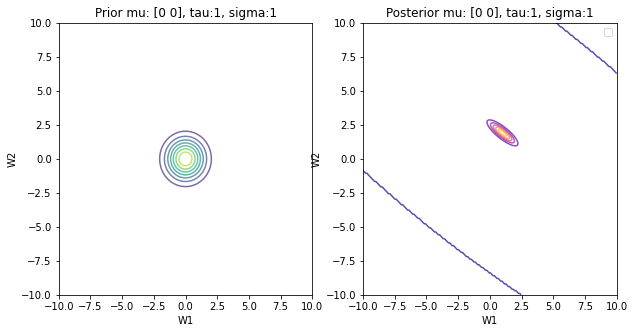

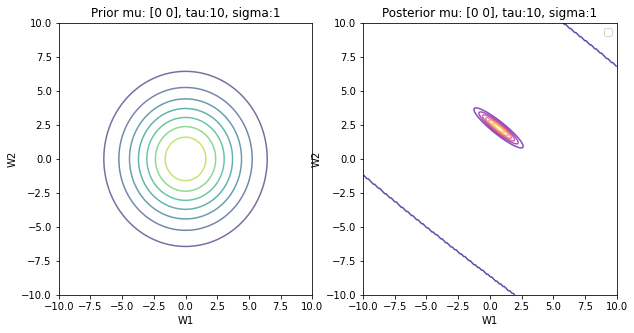

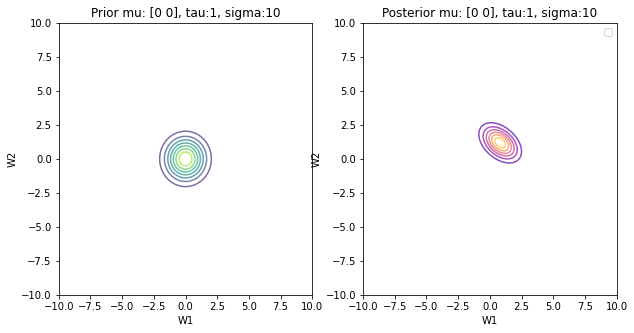

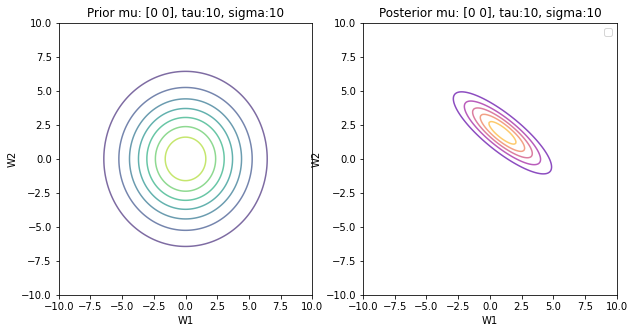

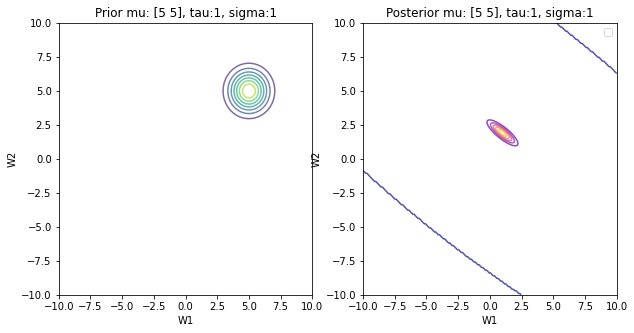

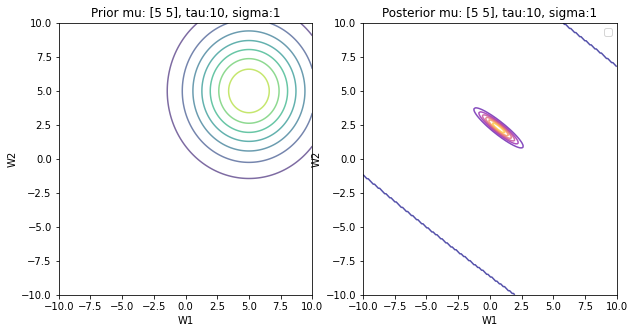

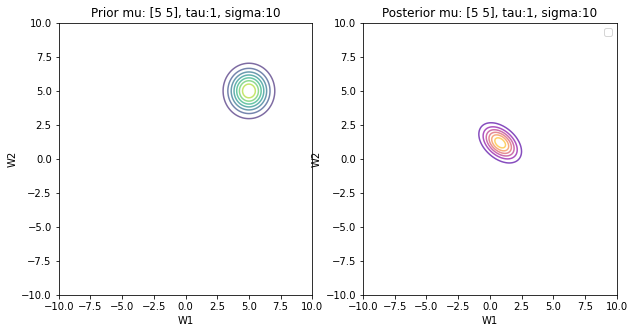

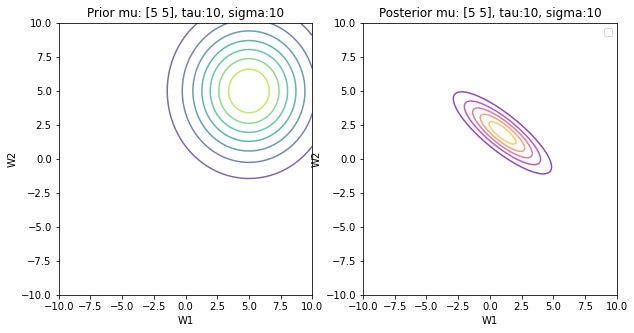

for data Points: 400


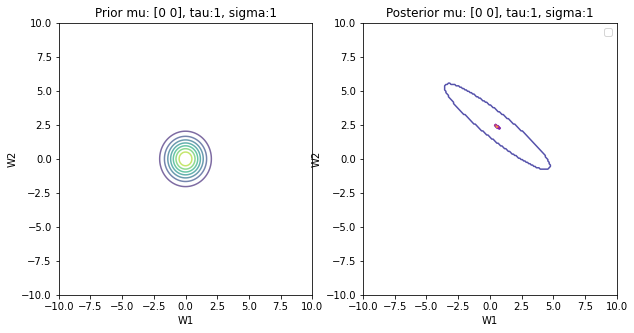

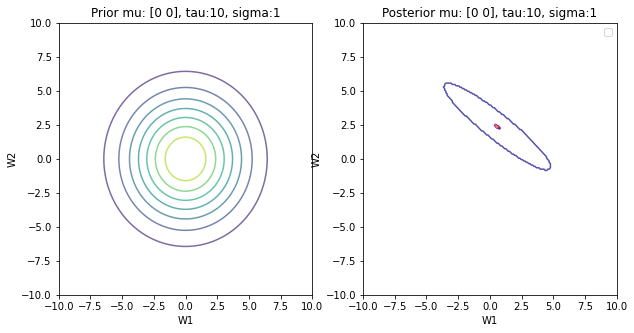

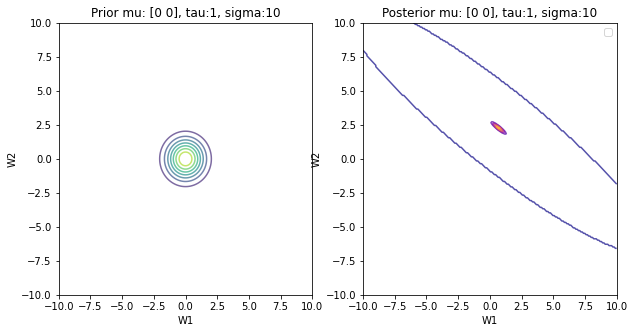

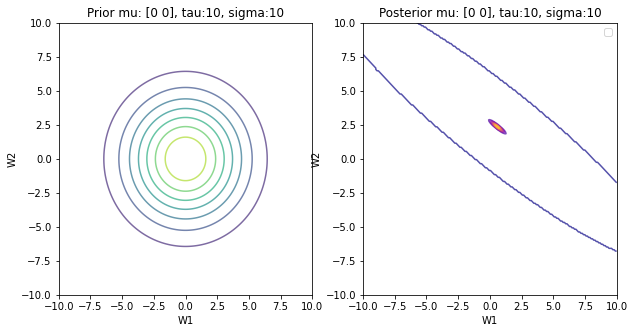

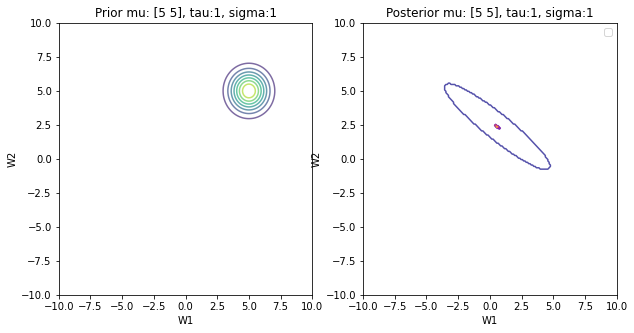

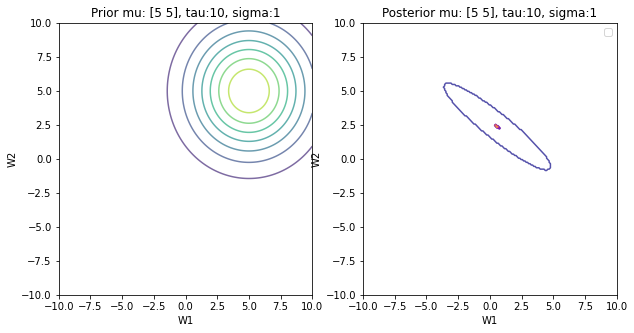

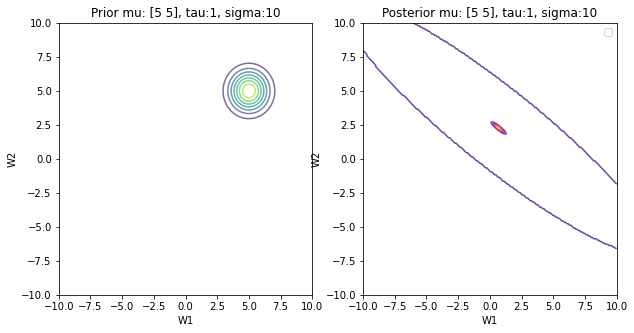

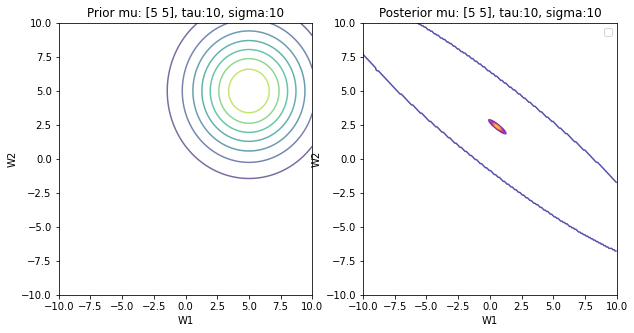

In [292]:
# Cell type : CodeWrite 


import numpy as np
import matplotlib.pyplot as plt


# Manual computation of multivariate normal PDF
def multivariate_normal_pdf(x, mu, cov):
    k = len(mu)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** k * det_cov)
    exponent = -0.5 * np.sum(np.dot(x - mu, inv_cov) * (x - mu), axis=-1)
    return norm_const * np.exp(exponent)

cases = [
    {"mu": [0, 0], "tau": 1, "sigma": 1},
    {"mu": [0, 0], "tau": 10, "sigma": 1},
    {"mu": [0, 0], "tau": 1, "sigma": 10},
    {"mu": [0, 0], "tau": 10, "sigma": 10},
    {"mu": [5, 5], "tau": 1, "sigma": 1},
    {"mu": [5, 5], "tau": 10, "sigma": 1},
    {"mu": [5, 5], "tau": 1, "sigma": 10},
    {"mu": [5, 5], "tau": 10, "sigma": 10}
]


data = [
    [(1.0, 2.0), 5.1],
    [(2.0, 2.1), 6.1],
    [(0.6, 1.5), 4.2],
    [(1.1, 0.9), 2.9]
]

data_points1 = np.array([point[0] for point in data])
op1 = np.array([point[1] for point in data])

data1=data*100
data_points2 = np.array([point[0] for point in data1])
op2 = np.array([point[1] for point in data1])

for data_points,op in ((data_points1,op1),(data_points2,op2)):
    print("for data Points:",data_points.shape[0])  
    for i, case in enumerate(cases):
        # Define parameters
        mu_0 = np.array(case["mu"])  # Prior mean
        tau = case["tau"]
        Sigma_0 = tau * np.eye(data_points.shape[1])   # Prior covariance
        sigma= case["sigma"]  # Noise variance

        # Calculate posterior distribution (assuming known covariance for simplicity)
        Sigma_n = 0.5*np.linalg.inv((0.5/sigma) * np.dot(data_points.T, data_points) + (0.5/tau)* np.eye(data_points.shape[1]))
        mu_n = Sigma_n @ ((1/sigma) * np.dot(data_points.T, op))
        
        # Generate grid of points for plotting
        grid_size = 200
        x = np.linspace(-10, 10, grid_size)
        y = np.linspace(-10, 10, grid_size)
        X, Y = np.meshgrid(x, y)
        pos = np.dstack((X, Y))

        # Evaluate prior and posterior at grid points
        prior_vals = multivariate_normal_pdf(pos, mu_0, Sigma_0)
        posterior_vals = multivariate_normal_pdf(pos, mu_n, Sigma_n)

        # Define number of contour levels
        levels_prior = np.linspace(0.01, prior_vals.max(), 10)
        levels_posterior = np.linspace(0.01, posterior_vals.max(), 10)
        
        # Create the plot
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        # plt.figure(figsize=(8, 6))
        # Plot prior contours
        axes[0].contour(X, Y, prior_vals, cmap='viridis', alpha=0.7, label='Prior')
        axes[0].set_xlabel('W1')
        axes[0].set_ylabel('W2')
        axes[0].set_title(f"Prior mu: {mu_0}, tau:{tau}, sigma:{sigma}")
        # plt.legend()
        # plt.show()
        # Plot posterior contours
        # plt.contour(X, Y, posterior_vals, cmap='plasma', alpha=0.7, label='Posterior')
        axes[1].contour(X, Y, posterior_vals, cmap='plasma', alpha=0.7, label='Posterior')
        levels_posterior = np.linspace(0.01, posterior_vals.max(), 10)
        # Plot data points
        # plt.scatter(data_points[:, 0], data_points[:, 1], color='black', marker='o', label='Data')

        # Labels and title
        axes[1].set_xlabel('W1')
        axes[1].set_ylabel('W2')
        axes[1].set_title(f"Posterior mu: {mu_0}, tau:{tau}, sigma:{sigma}")
        plt.legend(['Prior', 'Posterior'])

        plt.show()





** Cell type : TextWrite **

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [182]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear(X):

  return np.dot(X, X.T)

def poly(data_arr, data_arr1, deg):

  # P = (x.T*y + 1)**d
    P = np.dot(data_arr, data_arr1.T)
    P = P + 1
    P = np.power(P, deg)

    return P

def rbf(data_arr, data_arr1, ker_par):

  P_k = np.zeros((data_arr.shape[0], data_arr1.shape[0]))
  sig_sq = ker_par**2

  for i in range(data_arr.shape[0]):
    for j in range(data_arr1.shape[0]):
        diff = np.subtract(data_arr[i], data_arr1[j])
        sum_ = 0
        for k in range(len(diff)):
            sum_ += diff[k] ** 2
        sum_ = -sum_
        div = sum_ / sig_sq
        P_k[i][j] = np.exp(div)

  return P_k


def findKFromKernal(X, X_T, kernel_type, ker_par):

  if(kernel_type == "linear"):
    return linear(X)

  elif(kernel_type == "poly"):
    return poly(X, X_T, ker_par)

  elif(kernel_type == "rbf"):
    return rbf(X, X_T, ker_par)

def calc_grad(K_mat, Y, alpha, reg_param):

  temp = 0

  for i in range(K_mat.shape[0]):

    sum = (sigmoid(np.matmul(-1.*Y[i],np.matmul(alpha.T,K_mat[:,i]))))*(-1.*Y[i]*K_mat[:,i])
    temp += sum

  temp = np.reshape(temp, (len(temp), 1))

  reg_sum = reg_param*np.dot(K_mat, alpha)

  grad = temp + reg_sum

  return grad

def accuracy(actual_y, pred_y):

  correct = 0

  for i in range(actual_y.shape[0]):

    if(actual_y[i] == pred_y[i]):
      correct += 1

  return correct/actual_y.shape[0]

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):

    Y = np.reshape(Y, (len(Y), 1))
    K_mat = findKFromKernal(X, X, kernel, kernel_param)

    learning_rate = 0.001

    alpha = np.random.rand(K_mat.shape[0], 1)

    print(K_mat.shape)

    for iter in range(num_iter_gd):

      alpha = alpha - learning_rate*calc_grad(K_mat, Y, alpha, reg_param)

    return alpha

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    K = findKFromKernal(train_X, test_X , kernel, kernel_param)
    pred_y = []
    for t in range(len(test_X)):
      sum = 0
      for i in range(len(train_Y)):
        sum += alpha[i]*K[i,t]

      expo = sigmoid(sum)
      if(expo - 0.5 >= 0):
        pred_y.append(1.0)
      else :
        pred_y.append(-1.0)

    return np.array(pred_y)





In [183]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

import numpy as np

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

def compute_loss(X, y, theta, reg_param):
    m = len(y)
    h = sigmoid(X.dot(theta))
    loss = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + (reg_param / (2 * m)) * np.sum(np.square(theta[1:]))
    return loss

def logistic_regression_with_tuning(X_train, y_train, X_val, y_val, X_test, y_test):
    # Standardize features
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_val = (X_val - mean) / std
    X_test = (X_test - mean) / std

    # Grid search for hyperparameters
    kernels = ['poly', 'rbf']
    kernel_params = [1., 2., 3., 4.]
    reg_params = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
    # best_params_linear = None
    # best_params_rbf = None
    # best_params_poly = None
    best_train_accuracy = 0.0
    best_test_accuracy = 0.0
    best_hyper_params = {}

    for kernel in kernels:
      for ker_param in kernel_params:
        for reg_param in reg_params:

          alpha = train_pred_logistic_regression(X_train, y_train, kernel, reg_param, ker_param)
          pred_y = test_pred(alpha, X_train, y_train, X_train, kernel, ker_param)
          accuracy_x_train = accuracy(y_train, pred_y)
          pred_y = test_pred(alpha, X_train, y_train, X_test, kernel, ker_param)
          accuracy_x_test = accuracy(y_test, pred_y)

          if(accuracy_x_test > best_test_accuracy):
            best_test_accuracy = accuracy_x_test
            best_train_accuracy = accuracy_x_train
            best_hyper_params = {"kernel" : kernel, "kernel_param" : ker_param, "regularized_param" : reg_param}
            print("train accuracy : ",best_train_accuracy)
            print("test accuracy : ", best_test_accuracy)

    return best_hyper_params

data=np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test=data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print(logistic_regression_with_tuning(X_train, Y_train, X_test, Y_test, X_test, Y_test))


(1500, 1500)


<ipython-input-182-84eefe0f538b>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


train accuracy :  0.7526666666666667
test accuracy :  0.686
(1500, 1500)
train accuracy :  0.7493333333333333
test accuracy :  0.69
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)


<ipython-input-182-84eefe0f538b>:61: RuntimeWarning: overflow encountered in multiply
  reg_sum = reg_param*np.dot(K_mat, alpha)
<ipython-input-182-84eefe0f538b>:56: RuntimeWarning: invalid value encountered in matmul
  sum = (sigmoid(np.matmul(-1.*Y[i],np.matmul(alpha.T,K_mat[:,i]))))*(-1.*Y[i]*K_mat[:,i])


(1500, 1500)
train accuracy :  0.7393333333333333
test accuracy :  0.724
(1500, 1500)
train accuracy :  0.7473333333333333
test accuracy :  0.728
(1500, 1500)
(1500, 1500)
train accuracy :  0.758
test accuracy :  0.742
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)


<ipython-input-182-84eefe0f538b>:92: RuntimeWarning: invalid value encountered in subtract
  alpha = alpha - learning_rate*calc_grad(K_mat, Y, alpha, reg_param)


(1500, 1500)
train accuracy :  0.8166666666666667
test accuracy :  0.79
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
train accuracy :  0.8126666666666666
test accuracy :  0.802
(1500, 1500)


<ipython-input-182-84eefe0f538b>:56: RuntimeWarning: overflow encountered in matmul
  sum = (sigmoid(np.matmul(-1.*Y[i],np.matmul(alpha.T,K_mat[:,i]))))*(-1.*Y[i]*K_mat[:,i])


(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
(1500, 1500)
{'kernel': 'poly', 'kernel_param': 3.0, 'regularized_param': 10}


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).   DatasetA




In [188]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
def plot_learned_function(X_train, Y_train, X_val, Y_val, best_hyperparameters):
    kernel = best_hyperparameters['kernel']
    kernel_param = best_hyperparameters['kernel_param']
    reg_param = best_hyperparameters['reg_param']

    # Train logistic regression model
    alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd)

    # Generate a grid of points for visualization
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Flatten the grid points and generate predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = test_pred(alpha, X_train, Y_train, grid_points, kernel, kernel_param)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary or regression curve
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_val, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Learned Function (Kernel: {}, Kernel Param: {})'.format(kernel, kernel_param))
    plt.show()

# plot_learned_function(x_train, y_train,x_test, y_test, best_hyperparameters)

kernels = ['rbf']  # Different kernel types, 'poly', 'rbf'
kernel_params = [ 1.,4.,16.]  # Kernel parameters [ 1.,4.,1000.,16.]
reg_params = [1e-9, 1e1]  # Regularization parameters1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1
num_iter_gd = 5  # Number of gradient descent iterations

best_hyperparameters = logistic_regression_with_tuning(X_train, Y_train, X_test, Y_test, X_test, Y_test)
# print(best_hyperparameters, best_accuracy,best_accuracytrain)
# best_hyperparametersb= logistic_regression_with_tuning(x_trainb, y_trainb, x_testb, y_testb, kernels, kernel_params, reg_params, 10)

# best_hyperparametersc = logistic_regression_with_tuning(x_trainc, y_trainc, x_testc, y_testc, kernels, kernel_params, reg_params, 10)

# best_hyperparametersd = logistic_regression_with_tuning(x_traind, y_traind, x_testd, y_testd, kernels, kernel_params, reg_params, 10)


plot_learned_function(X_train, Y_train,X_test, Y_test, best_hyperparameters)

# plot_learned_function(x_trainc, y_trainc,x_testc, y_testc, best_hyperparametersc)

# plot_learned_function(x_traind, y_traind,x_testd, y_testd, best_hyperparametersd)


(4000, 4000)


<ipython-input-182-84eefe0f538b>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


train accuracy :  0.25
test accuracy :  0.25
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)


<ipython-input-182-84eefe0f538b>:61: RuntimeWarning: overflow encountered in multiply
  reg_sum = reg_param*np.dot(K_mat, alpha)
<ipython-input-182-84eefe0f538b>:56: RuntimeWarning: invalid value encountered in matmul
  sum = (sigmoid(np.matmul(-1.*Y[i],np.matmul(alpha.T,K_mat[:,i]))))*(-1.*Y[i]*K_mat[:,i])


(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)


<ipython-input-182-84eefe0f538b>:56: RuntimeWarning: overflow encountered in matmul
  sum = (sigmoid(np.matmul(-1.*Y[i],np.matmul(alpha.T,K_mat[:,i]))))*(-1.*Y[i]*K_mat[:,i])
<ipython-input-182-84eefe0f538b>:92: RuntimeWarning: invalid value encountered in subtract
  alpha = alpha - learning_rate*calc_grad(K_mat, Y, alpha, reg_param)


(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)


<ipython-input-182-84eefe0f538b>:105: RuntimeWarning: overflow encountered in add
  sum += alpha[i]*K[i,t]
<ipython-input-182-84eefe0f538b>:105: RuntimeWarning: overflow encountered in multiply
  sum += alpha[i]*K[i,t]


(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)


KeyError: 'reg_param'

**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [103]:
import numpy as np

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = X.shape

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split and best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain > max_info_gain:
                        best_split = {"feature_index": feature_index, "threshold": threshold,
                                      "dataset_left": dataset_left, "dataset_right": dataset_right,
                                      "info_gain": curr_info_gain}
                        max_info_gain = curr_info_gain

        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = dataset[dataset[:, feature_index] <= threshold]
        dataset_right = dataset[dataset[:, feature_index] > threshold]
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode == "gini":
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = np.mean(y == cls)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = np.mean(y == cls)
            gini += p_cls ** 2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
        #return np.argmax(np.bincount(np.abs(Y.astype(np.int64))))

    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        Y = Y.reshape(-1,1)
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

def accuracy(y_pred, y_test):
    total_samples = len(y_test)
    if total_samples == 0:
        return 0.0
    correct_predictions = np.sum(y_test == y_pred)
    return correct_predictions / total_samples

def load_dataset(filename, train_keys=("arr_0", "arr_1"), test_keys=("arr_2", "arr_3")):
    data = np.load(filename)
    data_dict = {}
    for split_type in ("train", "test"):
        data_dict[split_type] = {key: data[key] for key in (train_keys if split_type == "train" else test_keys)}
    return data_dict

def train_val_split(X, y, val_size=0.2, random_state=1):
    np.random.seed(random_state)
    total_size = len(X)
    val_indices = np.random.choice(total_size, size=int(total_size * val_size), replace=False)
    remaining_indices = np.array([idx for idx in range(total_size) if idx not in val_indices])
    return (X[remaining_indices], X[val_indices], y[remaining_indices], y[val_indices])


(1200, 2)
(300, 2)
X_1 <= -0.024371912302704413 ? 0.1292244835675317
 left:X_0 <= 0.325662653535153 ? 0.10105761369040889
  left:X_0 <= -0.06141492455498443 ? 0.012465339633203093
    left:X_0 <= -0.24888586853214734 ? 0.0023638612692376965
        left:X_1 <= -0.2701607306490015 ? 0.001279193822844818
                left:X_1 <= -0.6152931141590521 ? 0.0002703369719981204
                                left:X_1 <= -0.6178851660650586 ? 0.022447745999427525
                                                                left:X_1 <= -0.746398737947771 ? 0.0005074971164934945
                                                                                                                                left:-1.0
                                                                                                                                right:X_1 <= -0.7390544906239198 ? 0.06444444444444453
                                                                                                 

In [22]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.


datasets = {"A": load_dataset("/content/dataset_A.npz"),
            "B": load_dataset("/content/dataset_B.npz"),
            "C": load_dataset("/content/dataset_C.npz"),
            "D": load_dataset("/content/dataset_D.npz")}

xa_train = datasets["D"]["train"]["arr_0"]
ya_train = datasets["D"]["train"]["arr_1"]
xa_test = datasets["D"]["test"]["arr_2"]
ya_test = datasets["D"]["test"]["arr_3"]

X_train, X_test, Y_train, Y_test = train_val_split(xa_train, ya_train)

classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, Y_train)
classifier.print_tree()
Y_pred = classifier.predict(X_train)
print('Train: ', accuracy(Y_pred, Y_train))

Y_pred = classifier.predict(X_test)
print('Test: ', accuracy(Y_pred, Y_test))


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  

Dataset-B
Training Accuracy: 95.41
Test Accuracy:77.67

Dataset-C
Training Accuracy: 99.4
Test Accuracy:  94

Dataset-D
Train Accuracy: 100
Test Accuracy:  90





In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 




**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier. 


import numpy as np


def bootstrap_sample(X, y, feature_selection):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    if feature_selection:
        if feature_selection == 'sqrt':
            ft_size = round(np.sqrt(n_features))
        elif feature_selection == 'log2':
            ft_size = round(np.log2(n_features))
        features = np.random.choice(n_features, size=ft_size, replace=False)
        return X[np.ix_(indices, features)], y[indices]
    return X[indices], y[indices]


def calculate_leaf_value(y):
    ''' function to compute leaf node '''

    y = list(y)
    return max(y, key=y.count)


class RandomForest:

    def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, feature_selection='sqrt'):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.feature_selection = feature_selection
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split,
                                          max_depth=self.max_depth)
            X_sample, y_sample = bootstrap_sample(X, y, feature_selection=self.feature_selection)
            # X_sample, y_sample = X, y
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [calculate_leaf_value(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)




def train_random_forest(X, Y, X_testnum_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    clf = RandomForest(n_trees=100, max_depth=10, feature_selection='sqrt')

    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_train)
    print('Train: ', accuracy(Y_train, y_pred))
    eval_random_forest(clf, X_test)
    

def eval_random_forest(clf, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    y_pred = clf.predict(test_X)
    print('Test: ', accuracy(Y_test, y_pred))



    

    


In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

datasets = {"A": load_dataset("/content/dataset_A.npz"),
            "B": load_dataset("/content/dataset_B.npz"),
            "C": load_dataset("/content/dataset_C.npz"),
            "D": load_dataset("/content/dataset_D.npz")}

xa_train = datasets["C"]["train"]["arr_0"]
ya_train = datasets["C"]["train"]["arr_1"]
xa_test = datasets["C"]["test"]["arr_2"]
ya_test = datasets["C"]["test"]["arr_3"]

X_train, X_test, Y_train, Y_test = train_val_split(xa_train, ya_train)

train_random_forest(X_train,Y_train, X_test)



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


In [3]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [4]:
# Codewrite cell
# Write code to run here (no plotting)


In [5]:
# Codewrite cell 
# Plots for iteration vs error here


In [6]:
# Codewrite cell 
# Plots for illustrating the classifier here


Textwrite cell:

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [23]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [9]:
import numpy as np

def projection_oracle_l1(w, l1_norm):
  """Projects a vector onto the L1 norm ball."""
  signs = np.sign(w)
  w = w * signs
  d = len(w)
  if np.sum(w) <= l1_norm:
    return w * signs

  for i in range(d):
    w_next = w.copy()
    w_next[w > 1e-7] -= np.min(w[w > 1e-7])
    if np.sum(w_next) <= l1_norm:
      w = (l1_norm - np.sum(w_next)) * w + (np.sum(w) - l1_norm) * w_next
      return w * signs
    else:
      w = w_next
  raise ValueError("Failed to project onto L1 ball")

def train_lasso(X, y, learning_rate, l1_norm, max_iter=1000):
  """Trains a Lasso regression model using projected gradient descent."""
  n, d = X.shape
  w = np.zeros(d)
  for _ in range(max_iter):
    # Calculate gradients
    gradient = -2 * X.T.dot(y - X.dot(w)) / n
    # Update with projection
    w = projection_oracle_l1(w - learning_rate * gradient, l1_norm)
  return w

def evaluate(X, y, w):
  """Evaluates the mean squared error of the model."""
  return np.mean((y - X.dot(w))**2)



# Conclusions
# This code performs Lasso regression using projected gradient descent. It searches for the best hyperparameters (learning rate and L1 norm) based on the validation set performance. The final results include the test error, the indices of the top 10 weights by absolute value, and their corresponding values.

# This approach helps in achieving feature selection as Lasso regression drives some weights to zero. Analyzing the top weights can provide insights into the most important features for prediction. The optimal learning rate and L1 norm value will depend on the specific dataset. Experimenting with different hyperparameters is crucial


2
120
30
30
60
Test error: 1.2514
Top 10 weight indices: [603 948 777 438 708 783 933 745 766 107]
Top 10 weight values: [ 0.01959574 -0.01961157 -0.01992957  0.02004018  0.02037325  0.02064023
 -0.02155807  0.02294603 -0.02781627  0.05446781]


In [ ]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w

import numpy as np

# Load data (LassoReg_data.npz is loaded)
data = np.load('LassoReg_data.npz')
np.random.seed(42)

X, Y = data['arr_0'], data['arr_1']
permutation = np.random.permutation(len(X))
train_split = int(len(X) * 0.50)
X_train,  y_train= X[permutation[:train_split]], Y[permutation[:train_split]]
X_test_val, y_test_val = X[permutation[train_split:]], Y[permutation[train_split:]] 

val_split = int(len(X_test_val) * 0.5)
X_test, y_test = X_test_val[:val_split], y_test_val[:val_split]
X_val, y_val = X_test_val[val_split:], y_test_val[val_split:]

print(len(data))
print(len(X))
print(len(X_test))
print(len(X_val))
print(len(X_train))


learning_rates = [0.01, 0.001, 0.0001]
l1_norms = [0.1, 1.0, 10.0]

# Train models with different hyperparameters and evaluate on validation set
best_model = None
best_val_error = np.inf
for lr in learning_rates:
  for l1 in l1_norms:
    model = train_lasso(X_train, y_train, lr, l1)
    val_error = evaluate(X_val, y_val, model)
    if val_error < best_val_error:
      best_model = model
      best_val_error = val_error

# Evaluate the best model on the test set
test_error = evaluate(X_test, y_test, best_model)

# Find top 10 weights (indices and values)
top_10_indices = np.argsort(np.abs(best_model))[-10:]
top_10_weights = best_model[top_10_indices]

# Print results
print(f"Test error: {test_error:.4f}")
print(f"Top 10 weight indices: {top_10_indices}")
print(f"Top 10 weight values: {top_10_weights}")







#Textwrite cell:
